# 2.3 Complex Machine Learning Models and Keras Part2

### Table of Content 
1. Importing Libraries and Data  
2. Data Wrangling  
3. Random Forest Models  
4. Uncovering Feature Importances  
5. Modeling the top three most influencial weather sations in order of importance for all years  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# path = r'/Users/yourname/Datasets'
path = r'C:\Users\supri\Desktop\Supriya\DataAnalysis\Project\Data Immersion\MachineLearningWithPython\ClimateWins\Data Sets'

In [4]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [5]:
# Import X unscaled weather observations data (unscaled)
# Import y predictions data (answers) 
unscaled = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [6]:
unscaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84

In [7]:
unscaled.shape

(22950, 170)

In [8]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
answers.shape

(22950, 16)

### 2. Data Wrangling

In [10]:
 #Drop 3 weather stations: all columns related to Tours, Gdansk and Rome from the unscaled dataset

unscaled = unscaled.drop(['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                        'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                        'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1)

In [11]:
unscaled.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=149)

In [12]:
unscaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,4.1,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,3.6,0.89,1.0161,0.18,0.66,0,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0,0.0,6.1,3.9,10.6,1.9,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,1.4,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,5.7,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.8,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,0.61,0.30,0

In [13]:
#Drop columns that end with 'wind_speed' and 'snow_depth'

columns_to_drop = unscaled.filter(regex='(_wind_speed|_snow_depth)$').columns
columns_to_drop

Index(['BASEL_wind_speed', 'BASEL_snow_depth', 'DEBILT_wind_speed',
       'DUSSELDORF_wind_speed', 'DUSSELDORF_snow_depth', 'HEATHROW_snow_depth',
       'KASSEL_wind_speed', 'LJUBLJANA_wind_speed', 'MAASTRICHT_wind_speed',
       'MADRID_wind_speed', 'MUNCHENB_snow_depth', 'OSLO_wind_speed',
       'OSLO_snow_depth', 'SONNBLICK_wind_speed', 'VALENTIA_snow_depth'],
      dtype='object')

In [14]:
unscaled = unscaled.drop(columns=columns_to_drop)

In [15]:
unscaled.shape

(22950, 134)

In [16]:
# Add three new columns cloud_cover, pressure and humidity for three locations and copy the values from the closest weather stations
unscaled[['KASSEL_cloud_cover', 'MUNCHENB_pressue', 'STOCKHOLM_humidity']]=unscaled[['LJUBLJANA_cloud_cover', 'SONNBLICK_pressure', 'OSLO_humidity']].copy()

In [17]:
unscaled.shape

(22950, 137)

In [18]:
# Save the unscaled dataframe to a CSV file
unscaled.to_csv(os.path.join(path,'unscaled_cleaned_date.csv'), index=False)

### 2. Data Wrangling

In [19]:
# Reduce observations dataset to 2010's

dfdecade = unscaled[(unscaled['DATE'].astype(str).str[:4] >= '2010') & (unscaled['DATE'].astype(str).str[:4] <= '2019')]
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressue,STOCKHOLM_humidity
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,5.0,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0,8,1.0054,0.76
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,3.0,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,7,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2,8,1.0250,0.74
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.015

In [20]:
# Reduce answers dataset to 2010's

answers_decade = answers[(answers['DATE'].astype(str).str[:4] >= '2010') & (answers['DATE'].astype(str).str[:4] <= '2019')]
answers_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Set display options to show all rows

pd.set_option('display.max_rows', None)

In [22]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [23]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [24]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
SONNBLICK: 32868 entries
DUSSELDORF: 32868 entries
BASEL: 32868 entries
BUDAPEST: 32868 entries
MADRID: 32868 entries
VALENTIA: 32868 entries
OSLO: 32868 entries
BELGRADE: 32868 entries
DEBILT: 32868 entries
LJUBLJANA: 32868 entries
MUNCHENB: 32868 entries
MAASTRICHT: 32868 entries
HEATHROW: 32868 entries
KASSEL: 32868 entries
STOCKHOLM: 32868 entries


In [25]:
#We have the same number of entries (32'868) for each station.
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [26]:
dfdecade.shape

(3652, 135)

In [27]:
answers_decade.drop(columns = 'DATE', inplace = True)

In [28]:
answers_decade.shape

(3652, 15)

### 3. Reshaping for modeling

In [29]:
X = dfdecade

In [30]:
y = answers_decade

In [31]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [32]:
X.shape

(3652, 135)

In [33]:
y.shape

(3652, 15)

### 4. Data Split

In [34]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


### 5. Random Forest Model

In [36]:
# Initialize the Random Forest model
# This creates 100 decision trees and uses them together to make predictions
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Check how accurate the model is
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set:", round(accuracy * 100, 2), "%")

Random Forest Accuracy on Test Set: 58.6 %


In [37]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

### 6. Uncovering Feature Importances

In [38]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([4.11661173e-03, 3.81285069e-03, 3.12608148e-03, 3.32277375e-03,
       1.96435416e-02, 1.01560838e-02, 2.31361064e-02, 3.14587623e-03,
       3.34573219e-02, 3.61421942e-03, 3.69890174e-03, 4.11580979e-03,
       3.11981724e-03, 1.53918780e-02, 3.29343521e-03, 4.44634663e-03,
       5.22396450e-03, 1.26030128e-02, 3.97556171e-04, 0.00000000e+00,
       0.00000000e+00, 1.51960274e-03, 1.49898213e-02, 1.68811854e-03,
       1.58609595e-02, 5.98659570e-03, 2.19737084e-02, 2.37538529e-03,
       3.00810040e-03, 4.25089936e-03, 4.94887996e-03, 1.36354487e-02,
       5.39235423e-03, 1.12056384e-02, 3.33408832e-03, 2.63250462e-02,
       3.92312126e-03, 3.61821138e-03, 5.24607308e-03, 5.23123928e-03,
       2.11425295e-02, 7.00472846e-03, 2.03645855e-02, 3.02831077e-03,
       3.95434037e-02, 2.69490726e-03, 4.64390435e-03, 4.17925170e-03,
       4.74914198e-03, 9.84328517e-03, 4.71656826e-03, 1.54169753e-02,
       2.79535251e-03, 1.52962382e-02, 2.77202646e-03, 2.28839245e-03,
      

In [39]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[4.11661173e-03, 3.81285069e-03, 3.12608148e-03, 3.32277375e-03,
         1.96435416e-02, 1.01560838e-02, 2.31361064e-02, 3.14587623e-03,
         3.34573219e-02],
        [3.61421942e-03, 3.69890174e-03, 4.11580979e-03, 3.11981724e-03,
         1.53918780e-02, 3.29343521e-03, 4.44634663e-03, 5.22396450e-03,
         1.26030128e-02],
        [3.97556171e-04, 0.00000000e+00, 0.00000000e+00, 1.51960274e-03,
         1.49898213e-02, 1.68811854e-03, 1.58609595e-02, 5.98659570e-03,
         2.19737084e-02],
        [2.37538529e-03, 3.00810040e-03, 4.25089936e-03, 4.94887996e-03,
         1.36354487e-02, 5.39235423e-03, 1.12056384e-02, 3.33408832e-03,
         2.63250462e-02],
        [3.92312126e-03, 3.61821138e-03, 5.24607308e-03, 5.23123928e-03,
         2.11425295e-02, 7.00472846e-03, 2.03645855e-02, 3.02831077e-03,
         3.95434037e-02],
        [2.69490726e-03, 4.64390435e-03, 4.17925170e-03, 4.74914198e-03,
         9.84328517e-03, 4.71656826e-03, 1.54169753e-02, 2.79535251

In [40]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.10391725, 0.05550739, 0.06241636, 0.07447584, 0.1091022 ,
       0.06433562, 0.03009691, 0.07260969, 0.10527034, 0.06220796,
       0.1051339 , 0.06134274, 0.03134373, 0.04683977, 0.0154003 ])

In [41]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [42]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

MADRID        0.109102
DEBILT        0.105270
MUNCHENB      0.105134
SONNBLICK     0.103917
BUDAPEST      0.074476
BELGRADE      0.072610
VALENTIA      0.064336
BASEL         0.062416
LJUBLJANA     0.062208
MAASTRICHT    0.061343
DUSSELDORF    0.055507
KASSEL        0.046840
HEATHROW      0.031344
OSLO          0.030097
STOCKHOLM     0.015400
dtype: float64

In [43]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['SONNBLICK', 'DUSSELDORF', 'BASEL', 'BUDAPEST', 'MADRID', 'VALENTIA', 'OSLO', 'BELGRADE', 'DEBILT', 'LJUBLJANA', 'MUNCHENB', 'MAASTRICHT', 'HEATHROW', 'KASSEL', 'STOCKHOLM']


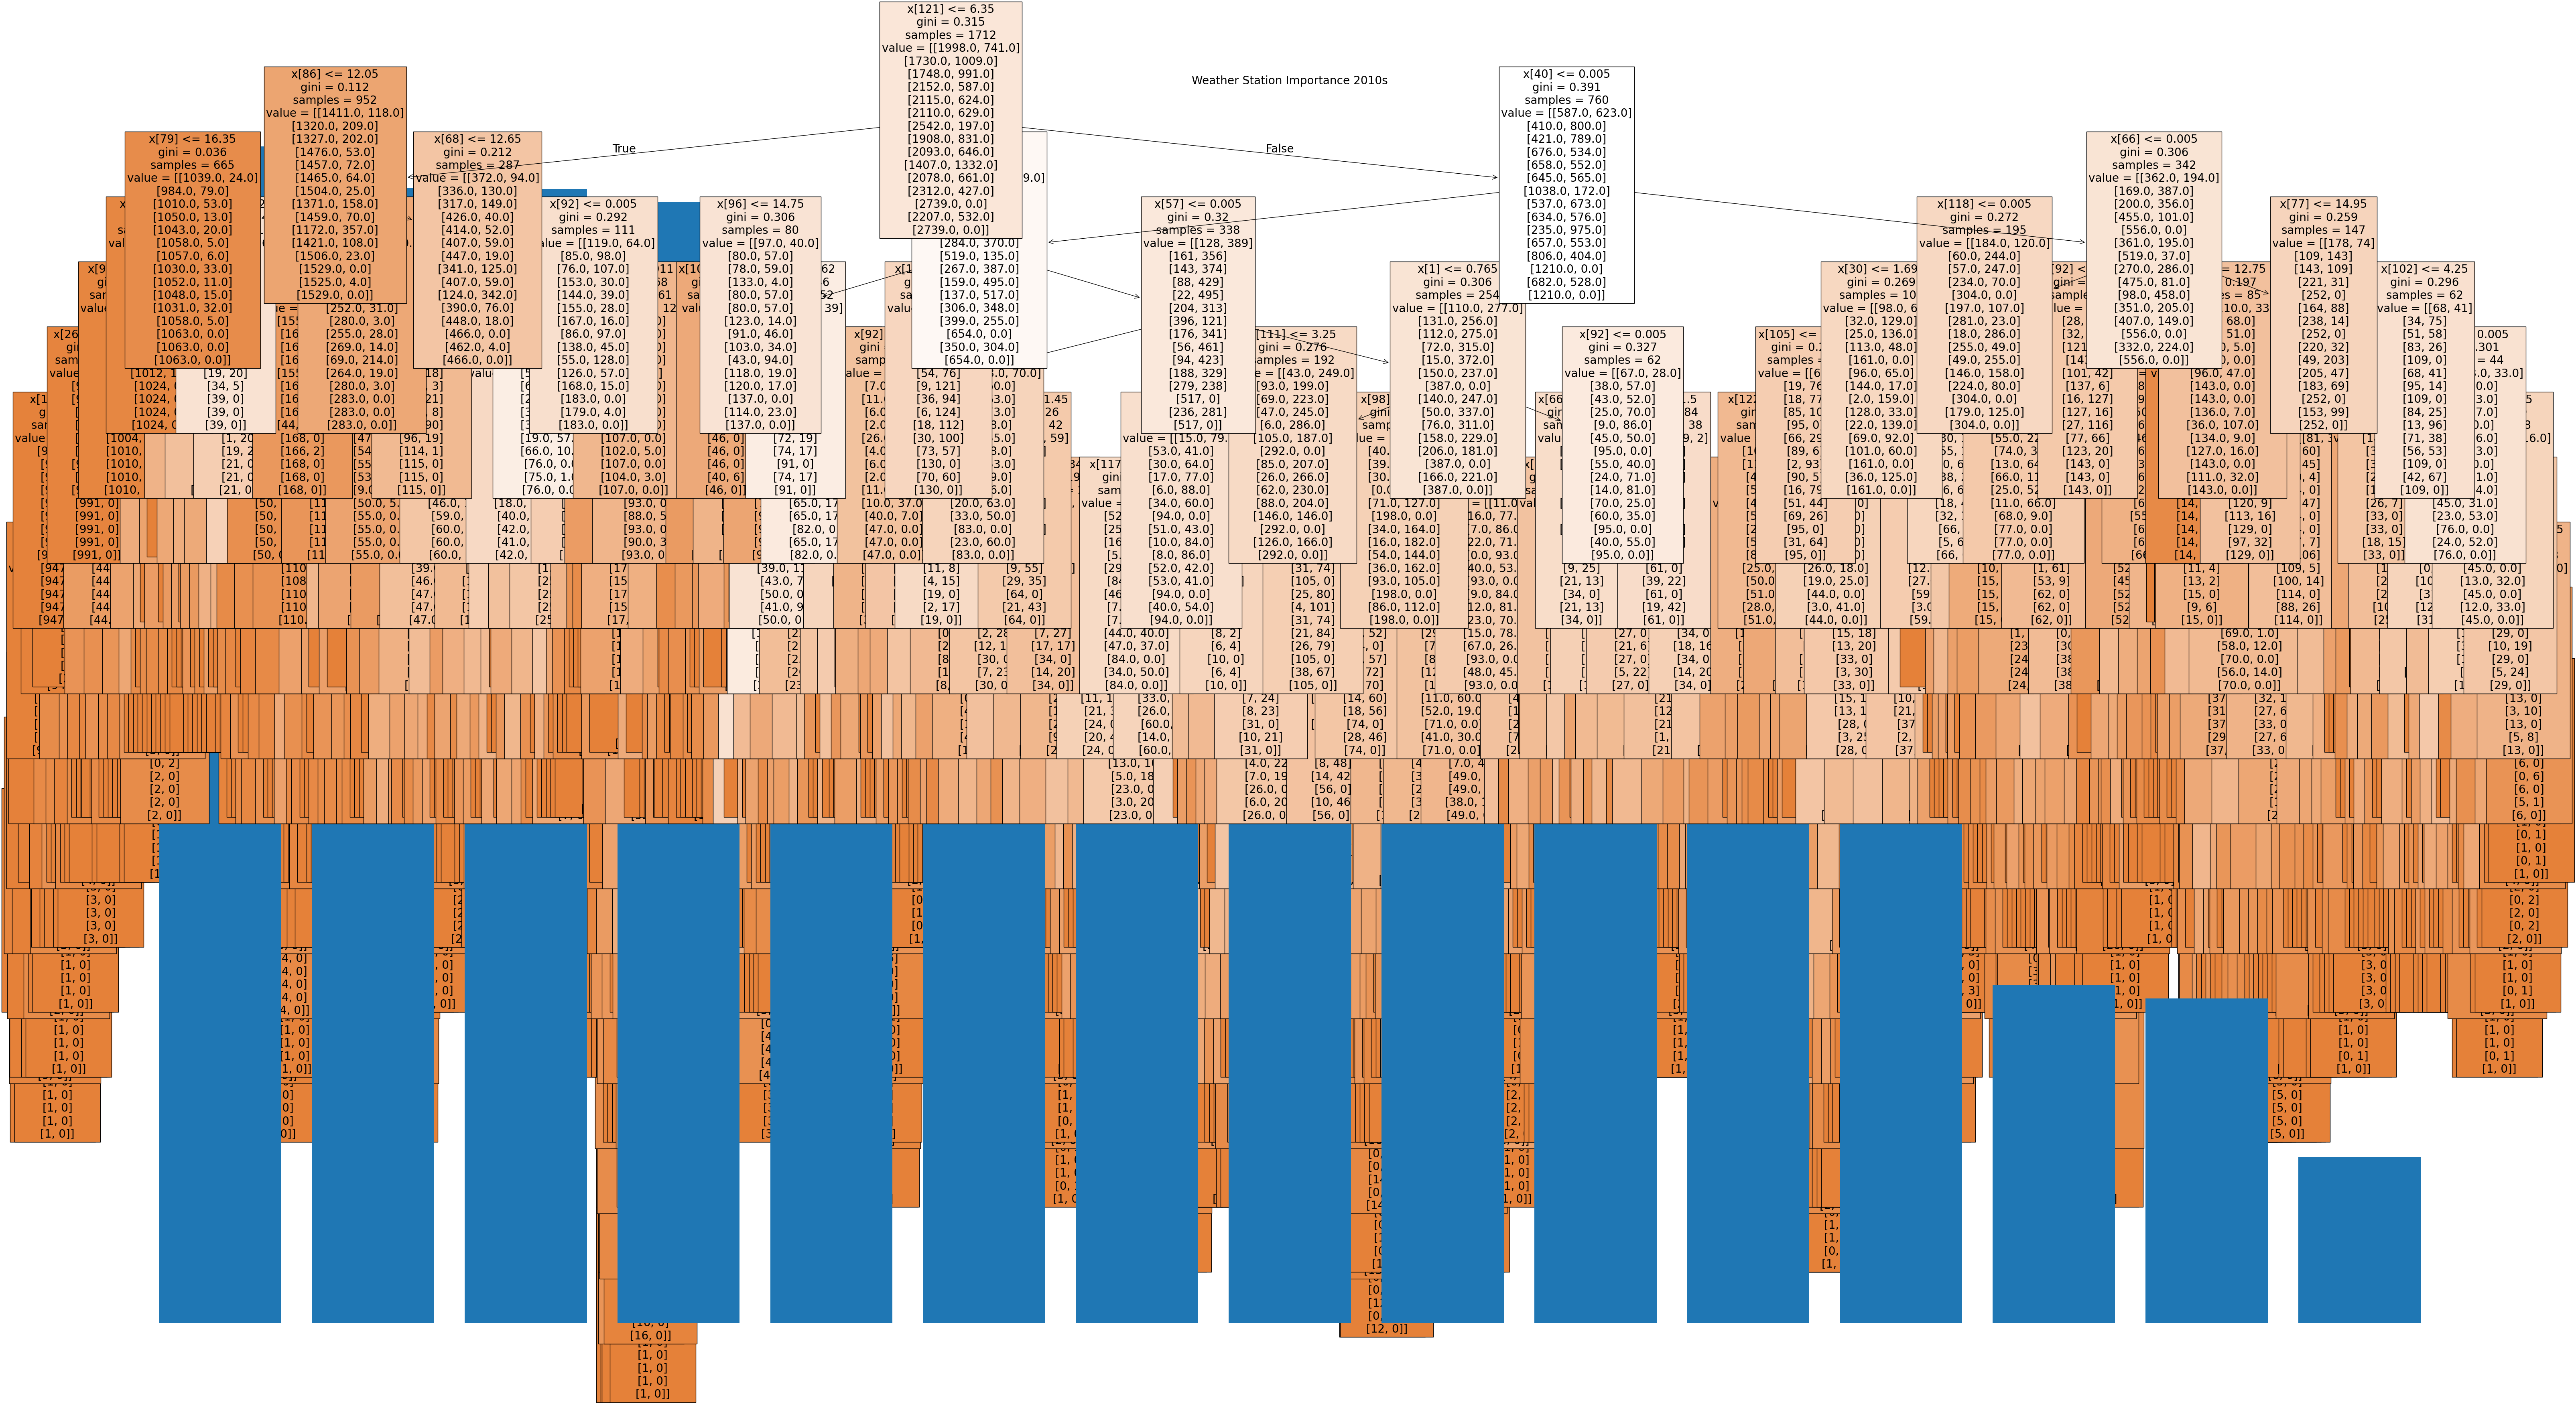

In [44]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.savefig(os.path.join(path, '2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()